In [36]:
#packages 
import numpy as np
import scipy.optimize as opt
from scipy import stats
import scipy as sp
from sympy import symbols, diff
from sympy.utilities.lambdify import lambdify
import matplotlib.pyplot as plt
from rouwen import rouwen
import warnings
warnings.filterwarnings("ignore")
import ar1_approx as ar1

In [3]:
#parameters 
alpha = 0.33
k = 5
z = 1
b = 2
t = 0.1
h = 24


# Problem 1
Take the 3rd order derivatives: $$X_{uuu} =-\frac{F_{xxx}X_u^3 + 3F_{xxu}X_u^2 + 3F_{xx}X_{uu}X_u + 3F_{xuu}x_u + 3F_{xu}X_{uu} + F_{uuu}}{F_x}.$$

# Problem 2


In [4]:
def labor(w, *args):
    alpha, z, k, b, t, h = args
    demand = ((1 - alpha) * z/w) ** (1/alpha) * k
    pi = z * k ** alpha*demand ** (1 - alpha) - w * demand
    supply = h - b/(w * (1 + b)) * (w * h + pi -t)
    return demand - supply

#solve for  w
args = (alpha, z, k, b, t, h)
w = opt.fsolve(labor, 0.8, args = args)[0]

In [5]:
#taking derivatives and approximate
def first_deriv(f, x0, h=1e-2):
    return (f(x0+h)-f(x0-h))/(2*h)

def second_deriv(f, x0, h=1e-2):
    return (f(x0+h)+f(x0-h)-2*f(x0))/(h**2)

def first_approx(f, x0, x):
    fp = first_deriv(f, x0)
    return f(x0) + fp * (x - x0)
    
def second_approx(f, x0, x):
    fp = first_deriv(f, x0)
    fpp = second_deriv(f, x0)
    return f(x0) + fp * (x - x0) + (1/2) * fpp * (x - x0) ** 2


In [6]:

def w_ss(k1, w_guess):
    args = (alpha, z, k1, b, t, h)
    return opt.fsolve(labor, w_guess, args = (args))[0]

f = lambda x: w_ss(x, 0.5)
    
print("1st Order Approximation: ", first_approx(f, 5, 5.1))
print("2nd Order Approximation: ", second_approx(f, 5, 5.1))

1st Order Approximation:  0.6315203597828906
2nd Order Approximation:  0.6314924977972608


In [7]:
#create grid for state variable
kgrid = np.linspace(1, 15, 15)
wgrid1= np.zeros_like(kgrid)
wgrid2= np.zeros_like(kgrid)
wgrid3= np.zeros_like(kgrid)
#true value of w
for i in range(15):
    wgrid1[i] = w_ss(kgrid[i], 0.5)
#approximated value of w
for i in range(15):
    wgrid2[i] = first_approx(f, 5, kgrid[i]) 
    wgrid3[i] = second_approx(f, 5, kgrid[i]) 


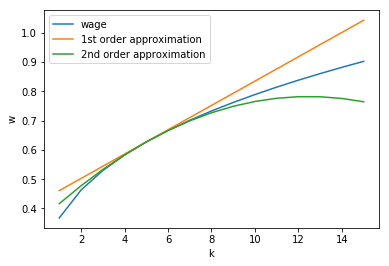

In [8]:
plt.plot(kgrid, wgrid1, label='wage')
plt.plot(kgrid, wgrid2, label='1st order approximation')
plt.plot(kgrid, wgrid3, label ='2nd order approximation')
plt.legend()
plt.xlabel('k')
plt.ylabel('w')
plt.show()


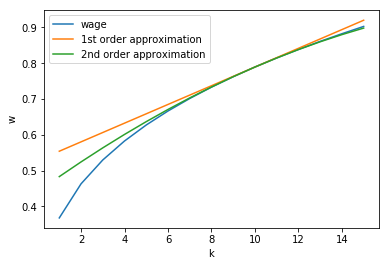

In [14]:
kgrid = np.linspace(1, 15, 15)
wgrid1 = np.zeros_like(kgrid)
wgrid2 = np.zeros_like(kgrid)
wgrid3 = np.zeros_like(kgrid)
for i in range(15):
    wgrid1[i] = w_ss(kgrid[i], 0.5)
for i in range(15):
    wgrid2[i] = first_approx(f, 10, kgrid[i]) 
    wgrid3[i] = second_approx(f, 10, kgrid[i]) 
plt.plot(kgrid, wgrid1, label='wage')
plt.plot(kgrid, wgrid2, label='1st order approximation')
plt.plot(kgrid, wgrid3, label ='2nd order approximation')
plt.legend()
plt.xlabel('k')
plt.ylabel('w')
plt.show()


# Problem 3


In [15]:
x, y = symbols('x y')
f = (x ** .35 + .9 * x - y) ** (-2.5) - 0.95 * (y ** 0.35 + 0.9 * y) ** (-2.5)
Fx = diff(f, x)
Fy = diff(f, y)
Fxx = diff(Fx, x)
Fxy = diff(Fx, y)
Fyy = diff(Fy, y)
Fxxx = diff(Fxx, x)
Fxxy = diff(Fxx, y)
Fxyy = diff(Fxy, y)
Fyyy = diff(Fyy, y)

Fx = lambdify((x,y), Fx, 'numpy')
Fy = lambdify((x,y), Fy, 'numpy')
Fxx = lambdify((x,y), Fxx, 'numpy')
Fxy = lambdify((x,y), Fxy, 'numpy')
Fyy = lambdify((x,y), Fyy, 'numpy')
Fxxx = lambdify((x,y), Fxxx, 'numpy')
Fxxy = lambdify((x,y), Fxxy, 'numpy')
Fxyy = lambdify((x,y), Fxyy, 'numpy')
Fyyy = lambdify((x,y), Fyyy, 'numpy')

xy = lambda x, y: -Fy(x,y)/Fx(x,y)
xyy = lambda x, y: -(Fxx(x,y)*xy(x,y) + 2*Fxy(x,y)*xy(x,y) + Fyy(x,y))/Fx(x,y)
xyyy = lambda x, y: -(Fxxx(x,y)*xy(x,y)**3+3*Fxxy(x,y)*xy(x,y)**2+3*Fxx(x,y)*xyy(x,y)*xy(x,y)+3*Fxyy(x,y)*xy(x,y)+
         3*Fxy(x,y)*xyy(x,y)+Fyyy(x,y))/Fx(x,y)

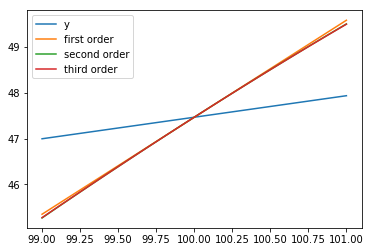

In [17]:
def get_y(y, arg):
    x = arg
    return (x ** .35 + .9 * x - y) ** (-2.5) - 0.95 * (y ** 0.35 + 0.9 * y) ** (-2.5)

x0 = 100
y0 = opt.fsolve(get_y, 49, args = (x0))

xgrid = np.linspace(99, 101, 40)
ygrid1 = np.zeros_like(xgrid)
ygrid2 = np.zeros_like(xgrid)
ygrid3 = np.zeros_like(xgrid)
ygrid4 = np.zeros_like(xgrid)

for i in range(40):
    ygrid1[i] = opt.fsolve(get_y, 49, args = (xgrid[i]))
y1 = ygrid1[0]
y2 = ygrid1[-1]
ygrid = np.linspace(y1, y2, 50)
for i in range(40):
    ygrid2[i] = y0+xy(x0, y0)*(xgrid[i]-x0)
    ygrid3[i] = y0+xy(x0, y0)*(xgrid[i]-x0) + (1/2)*xyy(x0, y0)*(xgrid[i]-x0) ** 2
    ygrid4[i] = y0+xy(x0, y0)*(xgrid[i]-x0)+(1/2)*xyy(x0, y0)*(xgrid[i]-x0)**2+(1/6)*\
               xyyy(x0, y0)*(xgrid[i]-x0)**3 
plt.plot(xgrid, ygrid1, label='y')
plt.plot(xgrid, ygrid2, label='first order')
plt.plot(xgrid, ygrid3, label='second order')
plt.plot(xgrid, ygrid4, label='third order')

plt.legend()
plt.show()

# Problem 4


In [18]:
beta=0.98
alpha=0.35
Xu=0.35
k = (alpha * beta) ** (1/(1 - alpha))

In [20]:

x, y, u, a, b = symbols('x y u a b')
f = 1/(u ** a - x) - b * a * x ** (a - 1)/(x ** a - y)
Fx = diff(f, x)
Fy = diff(f, y)
Fyy = diff(Fy, y)
Fyx = diff(Fy, x)
Fyu = diff(Fy, u)
Fxx = diff(Fx, x)
Fxu = diff(Fx, u)
Fuu = diff(diff(f, u), u)

Fx = lambdify((x, y, u, a, b), Fx, 'numpy')
Fy = lambdify((x, y, u, a, b), Fy, 'numpy')
Fyy = lambdify((x, y, u, a, b), Fyy, 'numpy')
Fxx = lambdify((x, y, u, a, b), Fxx, 'numpy')
Fyx = lambdify((x, y, u, a, b), Fyx, 'numpy')
Fyu = lambdify((x, y, u, a, b), Fyu, 'numpy')
Fxu = lambdify((x, y, u, a, b), Fxu, 'numpy')
Fuu = lambdify((x, y, u, a, b), Fuu, 'numpy')

Fx = Fx(k,k,k,alpha,beta)
Fy = Fy(k,k,k,alpha,beta)
Fyy = Fyy(k,k,k,alpha,beta)
Fyx = Fyx(k,k,k,alpha,beta)
Fxx = Fxx(k,k,k,alpha,beta)
Fyu = Fyu(k,k,k,alpha,beta)
Fxu = Fxu(k,k,k,alpha,beta)
Fuu = Fuu(k,k,k,alpha,beta)

Xuu = -(Fyy*Xu**4+2*Fyx*Xu**3+2*Fyu*Xu**2+Fxx*Xu**2+2*Fxu*Xu+Fuu)/(Fy*Xu**2+Fy*Xu+Fx)



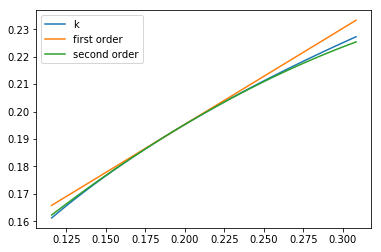

In [22]:
kgrid = np.linspace(0.6*k, 1.6*k, 30)
k1 = alpha * beta * kgrid ** alpha
k2 = np.zeros(30)
k3 = np.zeros(30)
for i in range(30):
    k2[i] = k + Xu * (kgrid[i] - k)
    k3[i] = k + Xu * (kgrid[i] - k) + (1/2) * Xuu * (kgrid[i] - k) ** 2
plt.plot(kgrid, k1, label='k')
plt.plot(kgrid, k2, label='first order')
plt.plot(kgrid, k3, label = 'second order')
plt.legend()
plt.show()

# Problem 5


In [31]:
alpha = 0.35
beta = 0.98
rho = 0.95
sigma = 0.02
kbar = (alpha * beta) ** (1/(1 - alpha))
zbar = 0
e=0.000001
guess  = np.zeros(4) + 0.2

In [24]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [26]:
def Lin_SS(k2=kbar, k1=kbar, k=kbar, z1=zbar, z=zbar):
    SS = (alpha * beta * np.exp(z1) * k1 ** (alpha - 1) * (np.exp(z) * k ** alpha - k1))/(np.exp(z1) * k1 ** alpha - k2)-1
    return SS
F = (Lin_SS(k2=kbar+e) - Lin_SS(k2=kbar-e))/(2 * e)
G = (Lin_SS(k1=kbar+e) - Lin_SS(k1=kbar-e))/(2 * e)
H = (Lin_SS(k=kbar+e) - Lin_SS(k=kbar-e))/(2 * e)   
L = (Lin_SS(z1=zbar+e) - Lin_SS(z1=zbar-e))/(2 * e)
M = (Lin_SS(z=zbar+e) - Lin_SS(z=zbar-e))/(2 * e)
N = 0.95
Gamma_A = np.array([F, G, H, L, M])
Hx = (-G - np.sqrt(G ** 2 - 4 * F * H))/(2 * F)
Hz = -(L * N + M)/(F * N + F * Hx + G)

In [28]:
Fs = np.zeros((5, 3))
Fs[0, 0] = Hx * Hx
Fs[0, 1] = Hx * Hz + Hz * N
Fs[1, 0] = Hx
Fs[1, 1] = Hz
Fs[2, 0] = 1
Fs[3, 1] = N
Fs[4, 1] = 1

In [29]:
Gamma_AA = np.zeros((5, 5))
keys = ['k2', 'k1', 'k', 'z1', 'z']
values = [kbar, kbar, kbar, zbar, zbar]
for i in range(5):
    for j in range(5):
        if i == j:
            L =dict(zip(keys, values))
            L[keys[i]] = values[i] + e
            
            J = dict(zip(keys, values))
            J[keys[i]] = values[i] - e
            K = dict(zip(keys, values))
            Gamma_AA[i, i] = (Lin_SS(**L) - 2 * Lin_SS(**K)+ Lin_SS(**J))/(e ** 2)
        else:
            G = dict(zip(keys, values))
            G[keys[i]] = values[i] + e
            G[keys[j]] = values[j] + e
            
            E = dict(zip(keys, values))
            E[keys[i]] = values[i] - e
            E[keys[j]] = values[j] + e
            
            R = dict(zip(keys, values))
            R[keys[i]] = values[i] + e
            R[keys[j]] = values[j] - e
            
            P = dict(zip(keys, values))
            P[keys[i]] = values[i] - e
            P[keys[j]] = values[j] - e
            
            Gamma_AA[i, j] = (Lin_SS(**G)-Lin_SS(**E)-Lin_SS(**R)+Lin_SS(**P))/(4 * e ** 2)
Lambda = np.dot(np.dot(np.kron(Fs.T, np.identity(1)), (Gamma_AA)), Fs)
Lambda[2,2] = Hz * Gamma_AA[0,0] * Hz

In [32]:
def Fss(soln):
    Fss = np.zeros((15,3))
    Fss[0,:] = np.array([soln[0]*Hx*Hx + Hx*soln[0], soln[0]*Hx*Hz + Hx*soln[1] + soln[1]*Hx*N, 0])
    Fss[1,:] = np.array([soln[0], soln[1], 0])
    Fss[5,:] = np.array([soln[0]*Hx*Hz + Hx*soln[1] + soln[1]*Hx*N, soln[1]*N*Hz + Hx*soln[2] + soln[2]*N*N, 0])
    Fss[6,:] = np.array([soln[1], soln[2], 0])
    Fss[10,:] = np.array([0, 0, Hx*soln[3] + soln[3]])
    Fss[11,:] = np.array([0, 0, soln[3]])
    error = Lambda + np.dot(np.kron(np.identity(3), Gamma_A), Fss)
    return np.array([error[0, 0], error[0, 1], error[1, 0], error[1, 1]])
Hxx, Hxz, Hzz, Hvv = opt.fsolve(Fss, guess)

In [37]:
k_lb = 0.5 * kbar
k_ub = 1.5 * kbar
kgrid = np.linspace(k_lb, k_ub, 25)
sizek = len(kgrid)
step = 10 * sigma/25
pi, zgrid = ar1.rouwen(rho, 0, step, 25)
sizez = len(zgrid)
optk = np.zeros((sizek, sizez))
for i in range(sizek):
    optk[i,:] = Hx * (kgrid[i] - kbar) + Hz * (zgrid - 0) + (1/2) * (Hxx * (kgrid[i] - kbar) ** 2+ Hzz * (zgrid[i] - zbar) ** 2+2 * Hxz * (kgrid[i] - kbar) * (zgrid[i] - zbar)) + kbar

Text(0.5,0,'Policy Function')

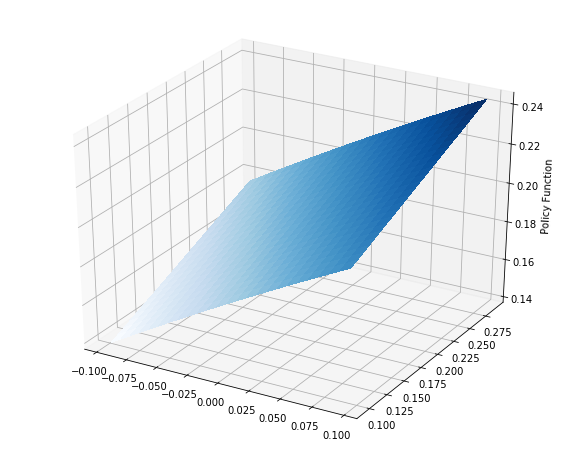

In [39]:
fig = plt.figure(figsize=(10, 8))
zmat, kmat = np.meshgrid(kgrid, zgrid)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(kmat, zmat, optk, rstride=1, cstride=1, cmap=cm.Blues,
                linewidth=0, antialiased=False)

ax.set_zlabel(r'Policy Function')